# Demo on how to explore the data

### Import the necessary modules and data

In [4]:
import numpy as np
import scipy as sp
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
inittotal,endtotal,nsteptotal,npstatustotal,npcount,necount=pickle.load(open('data/runsummary.pkl',mode='r'))

- #### initotal stores all the initial conditions
- #### endtotal stores all the end conditions
- #### nsteptotal stores how many steps each planet has in runs
- #### npstatustotal stores the end status of each run
- #### npcount stores the number of survived planets in the system
- #### necount stores the number of survived super earths in the system
Let's examine the dimension of the arrays to get familar with them. This example is with 150 runs and 6 planets, there are 8 elements for the init/end conditions: 
Time, a, e, i, peri, node, M, mass

In [5]:
print inittotal.shape 
print endtotal.shape
print nsteptotal.shape
print npstatustotal.shape
print npcount.shape
print necount.shape

(150, 6, 8)
(150, 6, 8)
(150, 6)
(150, 6)
(150,)
(150,)


In [22]:
#plotting function 
def plot_scatter(dataarr,param1,param2,xlim=[],ylim=[]):
    paramdic={"a":1,"e":2,"i":3,"peri":4,"node":5,"M":6,"mass":7}
    index1=paramdic[param1]
    index2=paramdic[param2]
    fig=plt.figure()
    ax=fig.add_subplot(111)
    try:
        ax.plot(dataarr[:,:,index1],dataarr[:,:,index2],'.')
    except IndexError:
        ax.plot(dataarr[:,index1],dataarr[:,index2],'.')
    ax.set_xlabel(param1)
    ax.set_ylabel(param2)
    if len(xlim)>0:
        ax.set_xlim(xlim)
    if len(ylim)>0:
        ax.set_ylim(ylim)
    plt.show()
    return

Let's take a look at the initial condition.

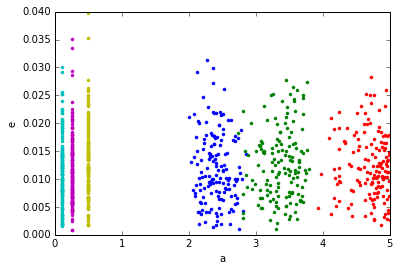

In [23]:
plot_scatter(inittotal,"a","e")

Let's also examine the end result. Since there are lots of planets get rejected or collided with the star, we should make sure to reset the axis limit. 

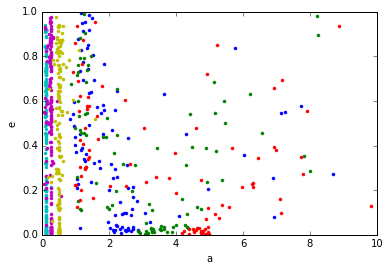

In [24]:
plot_scatter(endtotal,"a","e",xlim=[0,10],ylim=[0,1])

What's more interesting is the end result of all the **survived systems**. 

(150, 6)
(352, 8)


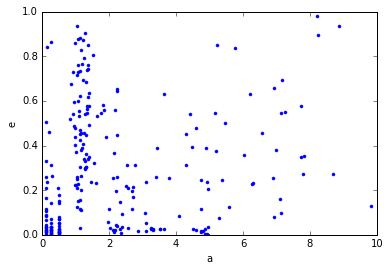

In [25]:
survive=npstatustotal==0
print survive.shape
print endtotal[survive,:].shape
plot_scatter(endtotal[survive,:],"a","e",xlim=[0,10],ylim=[0,1])
#TBD: need to figure out a way to color code this

Or only the systems with **superearths survive**. 

(27, 6)
(128, 8)


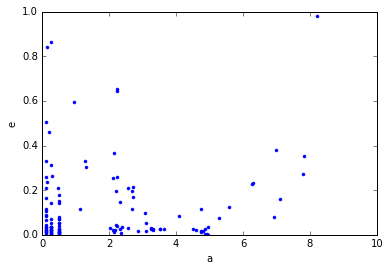

In [28]:
SEsys=necount>0
survive=npstatustotal[SEsys,:]==0
print survive.shape
print endtotal[SEsys,:,:][survive,:].shape
plot_scatter(endtotal[SEsys,:,:][survive,:],"a","e",xlim=[0,10],ylim=[0,1])